In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("poly.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [33]:
df.shape

(6, 3)

In [34]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [35]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [36]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [37]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [38]:
df.drop(['sno'],axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [39]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<BarContainer object of 6 artists>

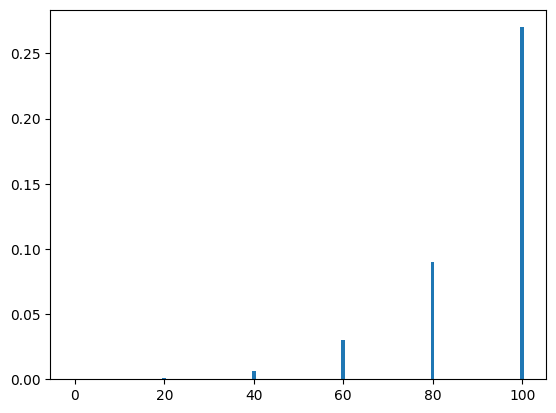

In [40]:
m=df['Temperature']
n=df['Pressure']
plt.bar(m,n)

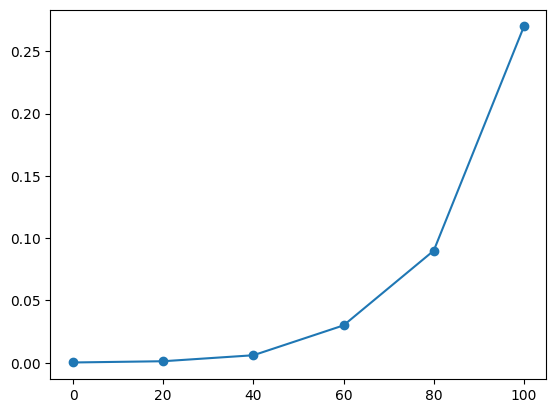

In [41]:
plt.scatter(m.values,n.values)
plt.plot(m.values,n.values)

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

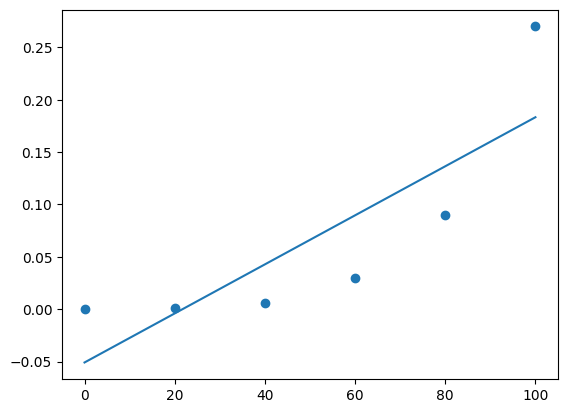

In [44]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(y,y_pred)
r2=r2_score(y,y_pred)
mape

44.775078189300416

In [46]:
r2

0.690349972603981

In [47]:
#Polynomial model
from sklearn.preprocessing import PolynomialFeatures
features=PolynomialFeatures(degree=2)
x_poly=features.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [48]:
x_poly.shape

(6, 3)

In [49]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [50]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [51]:
mape1=mean_absolute_percentage_error(y,y_poly)
mape1

15.926055555558678

In [52]:
r22=r2_score(y,y_poly)
r22

0.9568461098911795

In [53]:
df2=pd.DataFrame({"Actual_value":y,'simple linear regression':y_pred,'Polynomial regression':y_poly})
df2

,Actual_value,simple linear regression,Polynomial regression
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975


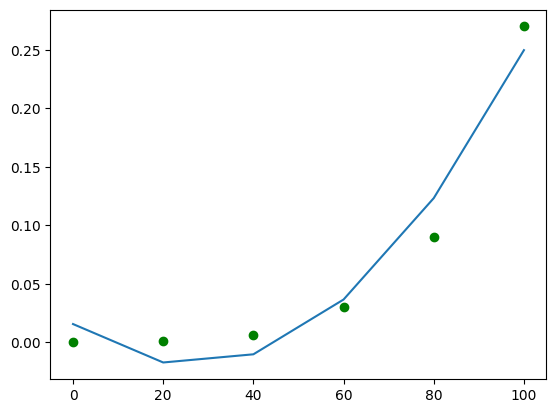

In [54]:
plt.scatter(x,y,color='g')
plt.plot(x,y_poly)